## Initialise

In [2]:
import qcodes as qc
import numpy as np
import sys
%matplotlib nbagg

helper_fns_folder = '/Users/Natalie/Documents/PhD/Qdev/QcodesRelated/HelperScripts'# r'C:\Users\qcodes-natalie\Qcodes-contrib' # TODO: enter path to transmon helper folder
if helper_fns_folder not in sys.path:
    sys.path.insert(0, helper_fns_folder)

from qdev_transmon_helpers import *

In [20]:
seq = make_full_ssb_wave(freq=1e6, duration=20e-6)

sequence check passed: 1 elements


<IPython.core.display.Javascript object>


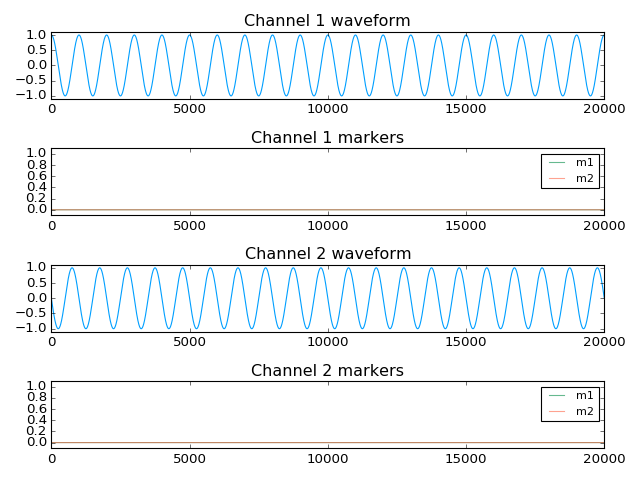

<IPython.core.display.Javascript object>


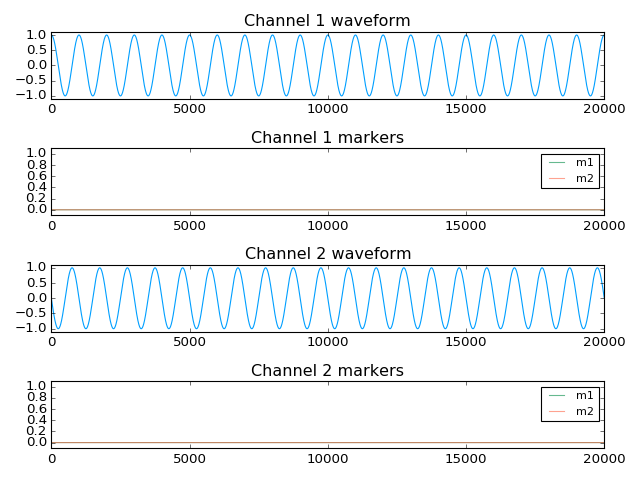

In [21]:
plot_sequence(seq)

In [2]:
set_sample_name('my_sample') # TODO: enter sample name
set_qubit_count(3)
set_file_locations()

# vna = helpers.import_vna()
# dec_slots, dec_chans = helpers.import_decadac()
dummy_time = import_manual_param()

Set up python log location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/python_logs/
-------------------------
Activating auto-logging. Current session state plus future input saved.
Filename       : C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/jupyter_logs/2017-03-18_14-26_ipythonlogfile.txt
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : True
State          : active
Set up jupyter log location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/log_files/jupyter_logs/
-------------------------
Set data location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/data/
-------------------------
Set data file format: {counter}
-------------------------
Set up analysis location: C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/analysis/
-------------------------
imported manual parameter: 'dummy_time'
---------

In [3]:
dummy_time(3)
data, plots = measure(dummy_time)

DataSet:
   mode     = DataMode.LOCAL
   location = 'C:/Users/qcodes-natalie/Qcodes-contrib/qdev_transmon_examples/my_sample/data/001'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | single_set | single       | (1,)
   Measured | dummy_time | dummy_time   | (1,)
acquired at 2017-03-18 14:26:38


In [10]:
get_latest_counter()

7

In [14]:
[re.findall(r'\d+', f) for f in os.listdir(path)]

[[], ['003'], ['001'], ['002']]

## Find all Resonators

In [4]:
# actual measurement

resonator_sweep_setup(v1)
data, plot = measure(v1.trace)

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/027'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | frequency     | frequency    | (2001,)
   Measured | VNA_magnitude | magnitude    | (2001,)
   Measured | VNA_phase     | phase        | (2001,)
acquired at 2017-01-10 18:09:50


In [2]:
# load data
data, plot = load(12)

### Find Resonator Positions

<IPython.core.display.Javascript object>


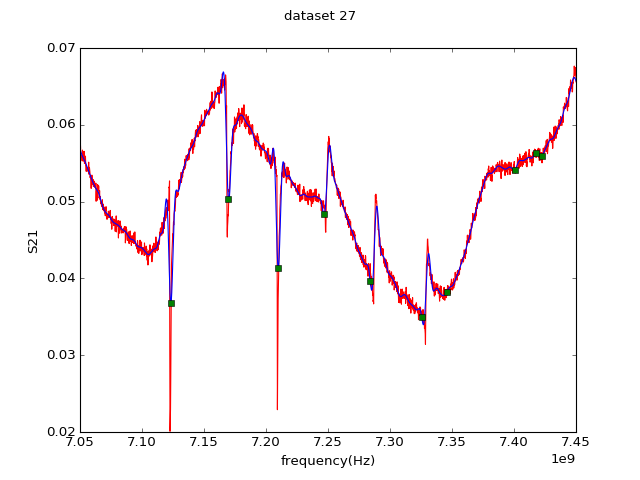

10 resonances found at [  7.12320000e+09   7.16960000e+09   7.20980000e+09   7.24640000e+09
   7.28400000e+09   7.32560000e+09   7.34580000e+09   7.40060000e+09
   7.41740000e+09   7.42220000e+09]


In [5]:
#fs = 400e6 * 2001 # sampling frequency used for smoothing  (ie span * npts)

fs = (v1.stop.get_latest() - v1.start.get_latest()) * v1.npts.get_latest()

indices, resonances_array, res_attempt_plot = find_peaks(data, fs)
save_plot(res_attempt_plot)

## Power Sweeps (qubits alive?)

In [9]:
# actual measurement

power_sweep_setup(v1)
pow_sweeps = []

for f in resonances_array:
    dat, pl = do_power_sweep(v1, f)
    pow_sweeps.append(dat)

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/028'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (41,)
   Measured | frequency     | frequency    | (41, 201)
   Measured | VNA_magnitude | magnitude    | (41, 201)
   Measured | VNA_phase     | phase        | (41, 201)
started at 2017-01-10 18:11:46
DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3/data/029'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (41,)
   Measured | frequency     | frequency    | (41, 201)
   Measured | VNA_magnitude | magnitude    | (41, 201)
   Measured | VNA_phase     | phase        | (41, 201)
started at 2017-01-10 18:12:31
DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/KDP78C0_qcodes3